In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [12]:
X, y = make_blobs(centers=5, random_state=42)

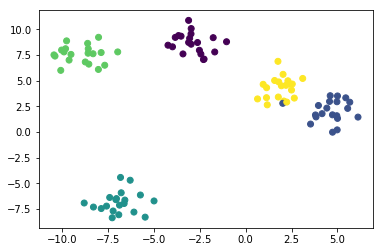

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [14]:
X.shape

(100, 2)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
model.coef_

array([[ 0.15723405,  0.56059404],
       [ 1.60425863, -1.04393857],
       [-0.43230329, -1.21957208],
       [-0.46864287,  0.17569381],
       [ 0.25639893,  0.08000686]])

In [19]:
model.intercept_

array([-3.98821934, -1.27601734, -0.46895235, -4.02761111, -1.45528081])

In [43]:
class CustomLogisticReg:
    
    def __init__(self, lr=.1, max_iters=20):
        self.lr = lr
        self.max_iters = max_iters
    
    def fit(self, X, y):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        
        self.classes = np.unique(y)
        
        thetas = []
        
        for item in self.classes:
            y_mod = (y==item).astype(int)
            self.__theta = np.random.randn(X.shape[1], 1)
            for i in range(self.max_iters):
                self.gradient_accend(X, y)
            
            thetas.append(self.__theta)
            
        arr = np.array(thetas)
        
        self.coef_ = arr[:, 1:]
        self.intercept_ = arr[:, 0]
    
    def gradient_accend(self, X, y):
        delta_theta = self.gradient(X, y)
        self.__theta += delta_theta
        
    def gradient(self, X, y):
        yh = self.hypothesis(X)
        ya = y.reshape(-1, 1)
        diff = (yh - ya)
        
        dll2theta = np.dot(X.T, diff) / len(X)
        return -dll2theta*self.lr
    
    def hypothesis(self, X):
        g = np.dot(X, self.__theta)
        return 1/(1 + np.exp(-g))
    
    
    def predict(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        output = self.hypothesis(X)
        return (output > .5).astype(int).flatten()
    
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean((yp==y))
        

In [44]:
model = CustomLogisticReg(lr=.1, max_iters=100)

In [45]:
model.fit(X, y)

In [46]:
model.classes

array([0, 1, 2, 3, 4])

In [47]:
model.intercept_

array([[13.84947257],
       [11.6573102 ],
       [12.66235638],
       [12.07935974],
       [11.35809085]])

(-20, 20)

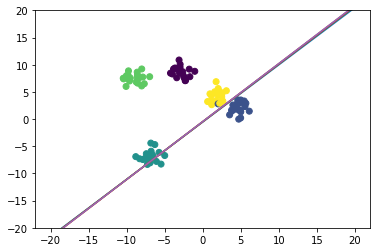

In [48]:
colors = ["red", "blue", "green", "black", "yellow", "orange"]

x1 = np.linspace(-20, 20, 10)
plt.scatter(X[:, 0], X[:, 1], c=y)
for i, ((m1, m2), c) in enumerate(zip(model.coef_, model.intercept_)):
    x2 = -(m1*x1)/m2 - (c/m2)
    plt.plot(x1, x2)
plt.ylim(-20, 20)

In [22]:
(y==3).astype(int)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])